In this example, after you do edge detection, you would only want e.g. to see the boundaries and not the edges in between the image inside these boundaries. Image contours are used around the image. 

First, we need to create a binary image/threshold. Can be done with a Canny Edge detector.

We will be reading in the image of a hand. This hand is found here:

smpswisconsin.org/site/raise-your-hand-taking-your-smps-involvement-to-the-next-level/

## Import resources and display image

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

print (cv2.__version__)

%matplotlib inline

3.2.0


Read in the image and make a copy of the image:

In [164]:
image = cv2.imread('C:\\Ellen\\Udacity\\Computer_Vision\\data\\hand_raising.jpg')

image_copy = np.copy(image)

Change color to RGB:

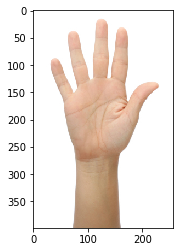

In [165]:
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

## Produce a binary image for finding contours

In [166]:
gray = cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)

Create a binary threshold:

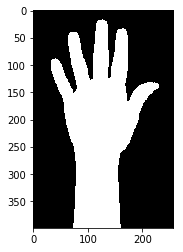

In [167]:
retval,binary = cv2.threshold(gray,225,255,cv2.THRESH_BINARY_INV) ## This is from the lecture
# More specifically here, it takes the white pixels and turns them black
# In our case, that does not work as the image is perhaps not fully black. 
plt.imshow(binary,cmap='gray')

The first argument is the image on which you want to apply the threshold on, the second argument is the threshold value which is 255 (white in this case). Subsequently:
- **THRES_BINARY:** All pixel intensities below T are set to 0. And all pixel intensities greater than T are set to 255.
- **THRES_BINARY_INV:** all pixels below T to 255 and all pixel intensities greater than T to 0.

For more information: https://docs.opencv.org/3.4.0/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a147222a96556ebc1d948b372bcd7ac59

opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html#thresholding

Or:
https://pythonprogramming.net/thresholding-image-analysis-python-opencv-tutorial/
https://www.learnopencv.com/opencv-threshold-python-cpp/

We see that the threshold value is not OK. This means that we have plot out the image in an array and see the "white" space. In order to solve that, perhaps it is good to first print out the pixel values of the grey scale array:

In [168]:
px = gray[0:10,0:10]
print(gray)

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


In order to see the pixel values in the middle of the hand:

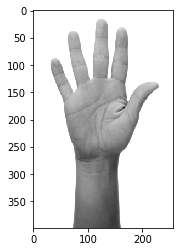

In [169]:
%matplotlib qt5
plt.imshow(gray,cmap = 'gray')

If you type that, this opens the image and then you can see the pixel values if you hover over it with your mousse.

Set the matplotlib back to the inline:

In [170]:
%matplotlib inline

## Find and draw the contours

In [171]:
# Find contours for thresholded image

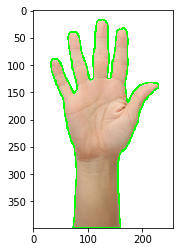

In [172]:
#retval,contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# In Python 3 it is like that

#In Python 2:
retval,contours, hierarchy = cv2.findContours(binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


#RETR_TREE: Mode of retrieval
#hierarchy: Contours one in the other

# Draw all contours on a copy of the original image
image_copy2 = np.copy(image_copy)

all_contours =  cv2.drawContours(image_copy2,contours, -1,(0,255,0),2)

# a thin green line

plt.imshow(all_contours,)

## Quiz

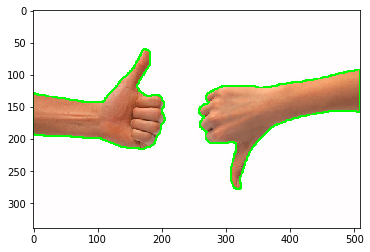

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in an image and convert to RGB
image = cv2.imread('C:\\Ellen\\Udacity\\Computer_Vision\\data\\thumbs-up-down_Udacity.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

# Find contours from thresholded image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contour_image = np.copy(image)
cv2.drawContours(contour_image, contours, -1, (0,255,0), 2)
plt.imshow(contour_image)

Select the first contour above and plot this:

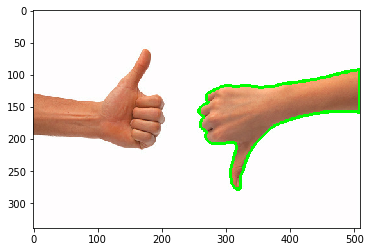

In [174]:
selected_contour = contours[0]
#selected_contour_2 = contours[1]

contour_image = np.copy(image)

# Draw the first contour (index = 0)
#contour_image = cv2.drawContours(contour_image, [selected_contour], 0,  (0,255,0), 3)
our_image = cv2.drawContours(contour_image, [selected_contour], 0,  (0,255,0), 3)
plt.imshow(contour_image)

Now, select the first hand:

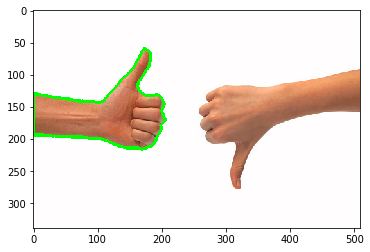

In [175]:
#selected_contour = contours[0]
selected_contour_2 = contours[1]

contour_image = np.copy(image)

# Draw the first contour (index = 0)
#contour_image = cv2.drawContours(contour_image, [selected_contour], 0,  (0,255,0), 3)
our_image = cv2.drawContours(contour_image, [selected_contour_2], 0,  (0,255,0), 3)
plt.imshow(contour_image)

First find the angle of one contour (do the left hand first:

In [176]:
(x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour_2)
print(angle)

82.27550506591797


Do the other hand first:

In [177]:
(x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour)
print(angle)

61.35833740234375


In [178]:
print (len(contours))

2


In [179]:
angles = []
for i in range(len(contours)):    
    print(i)
    (x,y), (MA,ma), angle = cv2.fitEllipse(contours[i])
    print(angle)
    angles.append(angle)
    print(angles)

0
61.35833740234375
[61.35833740234375]
1
82.27550506591797
[61.35833740234375, 82.27550506591797]


In [180]:
def orientations(contours):
    """
    Orientation 
    :param cnt: a list of contours
    :return: the orientations of the contours
    """
    
    # Create an empty list to store the angles in
    # Tip: Use angles.append(value) to add values to this list
    angles = []
    for i in range(len(contours)):    
        #print(i)
        (x,y), (MA,ma), angle = cv2.fitEllipse(contours[i])
        #print(angle)
        angles.append(angle)
        #print(angles)
    return angles

Test the function:

In [181]:
Angles=orientations(contours)
print(Angles)

[61.35833740234375, 82.27550506591797]


Now, we need to draw contours around the hands:

In [151]:
# Find the bounding rectangle of a selected contour
x,y,w,h = cv2.boundingRect(contours[1])

In [152]:
# Draw the bounding rectangle as a purple box
box_image = cv2.rectangle(contours[1], (x,y), (x+w,y+h), (200,0,200),2)

In [153]:
cropped_image = image[y: y + h, x: x + w]

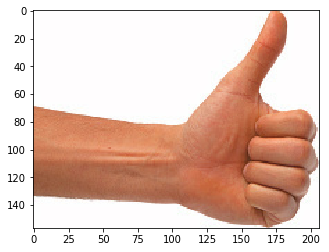

In [154]:
plt.imshow(cropped_image)

In [182]:
def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param contours: the contour that will be used for cropping
    :return: the cropped image around the left hand
    """
    
    ## TODO: Detect the bounding rectangle of the left hand contour
    x,y,w,h = cv2.boundingRect(selected_contour)
    
    ## TODO: Crop the image using the dimensions of the bounding rectangle
    box_image = cv2.rectangle(contours[1], (x,y), (x+w,y+h), (200,0,200),2)
    # Make a copy of the image to crop
    cropped_image = np.copy(image)
    
    cropped_image = cropped_image[y: y + h, x: x + w]
    return cropped_image



In [183]:
selected_contour = contours[1]

In [184]:
cropped_image = left_hand_crop(image, selected_contour)

Text(0.5,1,'Cropped Image')

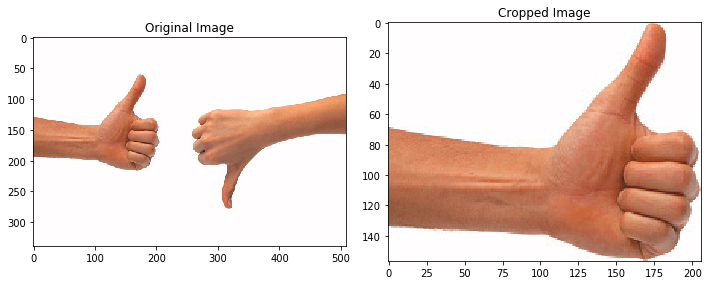

In [185]:
# Display the cropped image side-by-side with the original
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image')
ax2.imshow(cropped_image)
ax2.set_title('Cropped Image')